# 📊 Análisis Exploratorio de Datos (EDA) — E-commerce Brasileño

Este notebook presenta un análisis exploratorio del dataset público de Olist (Brazilian E-commerce).
Se investigan tendencias de ventas, categorías más populares, comportamiento de clientes y aspectos clave del negocio online.

Fuente Dataset : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


## 1️⃣ Importar librerías y cargar datos

In [47]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Estilo de gráficos
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [53]:
# Cargar datasets desde la carpeta 'data'
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
customers = pd.read_csv('data/olist_customers_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')

In [76]:

# Verificar primeras filas de cada uno
print("=== ORDERS ===")
print(orders.head())
print("=== ORDER ITEMS ===")
print(order_items.head())

=== ORDERS ===
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00   

## 2️⃣ Explorar la información básica 🔍

In [55]:
# Info general de cada dataset
print("Orders:")
print(orders.info())
print("\nOrder Items:")
print(order_items.info())
print("\nProducts:")
print(products.info())
print("\nCustomers:")
print(customers.info())
print("\nPayments:")
print(payments.info())
print("\nReviews:")
print(reviews.info())


Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Order Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id          

## 3️⃣ Análisis : pedidos por estado 📊

In [56]:
# Unir órdenes con clientes para ver pedidos por estado
orders_customers = pd.merge(orders, customers, on='customer_id')

In [57]:

# Contar pedidos por estado
orders_by_state = orders_customers['customer_state'].value_counts().sort_values(ascending=False)

# Mostrar
print(orders_by_state)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


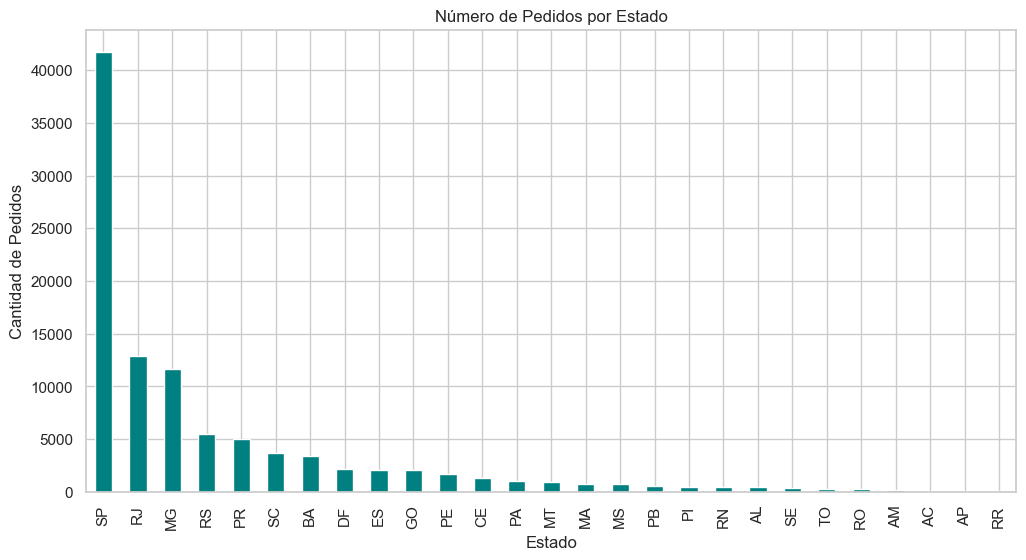

In [58]:
# Graficar
orders_by_state.plot(kind='bar', color='teal')
plt.title('Número de Pedidos por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Pedidos')
plt.show()

## 4️⃣ Análisis: categorías de productos más vendidos🛍️

In [59]:
# Unir order_items con products
items_products = pd.merge(order_items, products, on='product_id')

# Contar productos por categoría
top_categories = items_products['product_category_name'].value_counts().head(10)

# Mostrar
print(top_categories)

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64


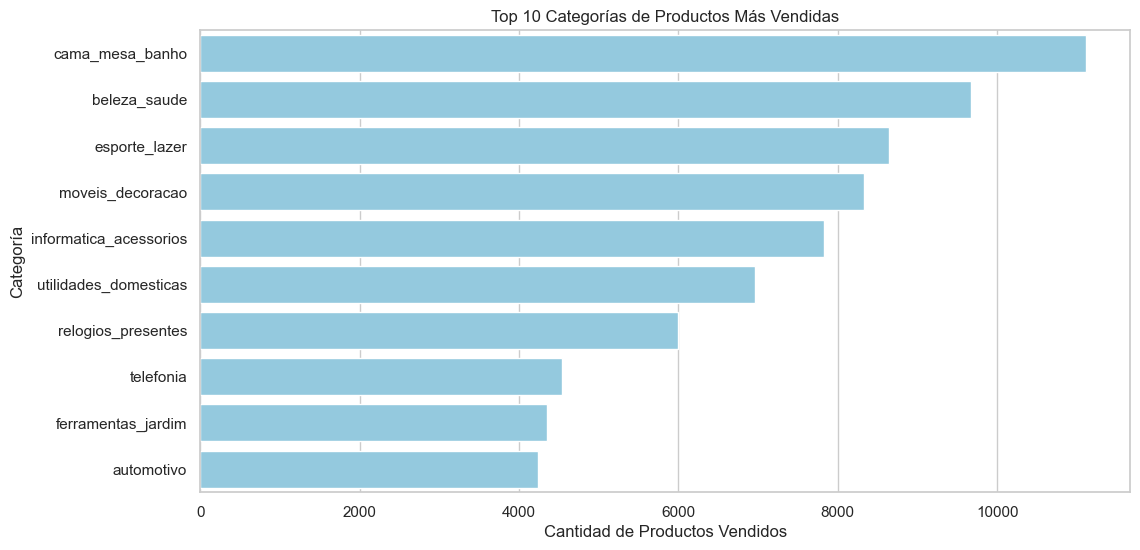

In [60]:
# Graficar
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    color='skyblue'   # Un solo color uniforme
)
plt.title('Top 10 Categorías de Productos Más Vendidas')
plt.xlabel('Cantidad de Productos Vendidos')
plt.ylabel('Categoría')
plt.show()

 ## 5️⃣ Análisis: métodos de pago más usados💳💵

In [61]:
# Agrupar pagos por tipo de pago
payment_types = payments['payment_type'].value_counts()

# Mostrar
print(payment_types)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


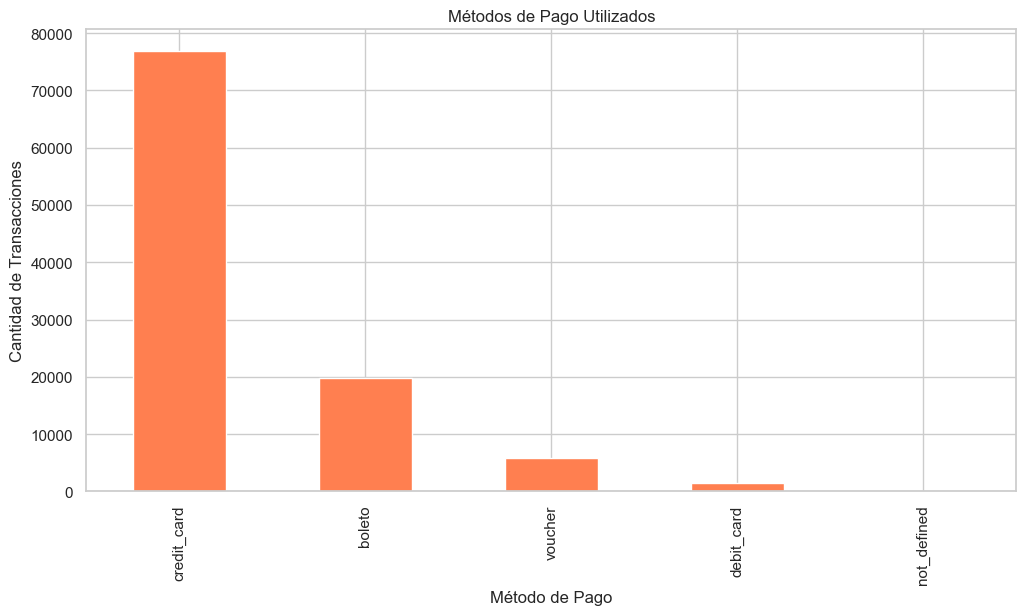

In [62]:
# Graficar
payment_types.plot(kind='bar', color='coral')
plt.title('Métodos de Pago Utilizados')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.show()

 ## 6️⃣ Análisis: puntuación de reviews⭐

In [63]:
# mostrar la cantidad de reviews por calificación
reviews_count = reviews['review_score'].value_counts().sort_index()

# Mostrar
print(reviews_count)

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


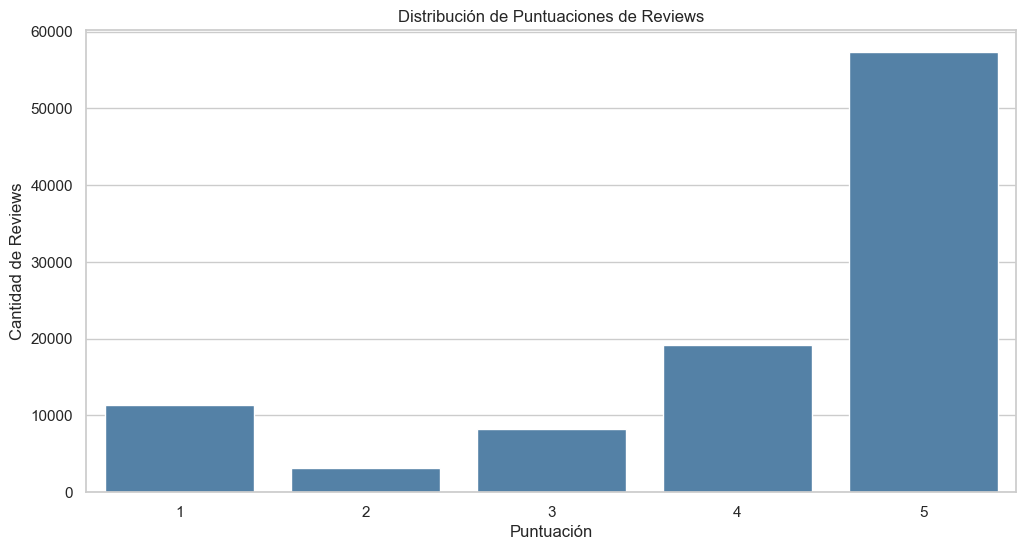

In [64]:
# Distribución de puntuaciones de reviews
sns.countplot(x='review_score', data=reviews, color='steelblue')
plt.title('Distribución de Puntuaciones de Reviews')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad de Reviews')
plt.show()


## ✅ Conclusiones

- La mayor cantidad de pedidos proviene del estado de São Paulo (SP) con 41746
- Las categorías más vendidas son principalmente Cama,mesa,baño (cama_mesa_banho) con 11115
- El método de pago más popular es la tarjeta de credito (credit_card) con 76795.
- La mayoría de las reviews tienen una calificación alta, indicando buena satisfacción del cliente, ya que la lidera la puntuacion 5 con 57328


